In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [2]:
raw_data = pd.read_csv('mbti_1.csv')
raw_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


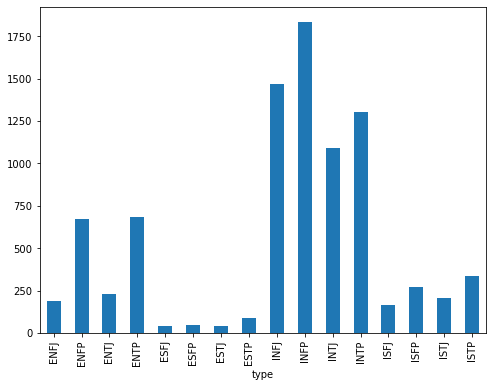

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
raw_data.groupby('type').posts.count().plot.bar(ylim=0)
plt.show()

In [3]:
df = raw_data
df['text'] = df['posts']
df['label'] = df['type']

In [4]:
types = ['infj', 'infp', 'intj', 'intp', 'istj', 'istp', 'isfp', 'isfj', 'enfj', 'enfp', 'entj', 'entp', 'estj', 'estp',
       'esfp', 'esfj']

additional = ['ti','nt','te','ni','ne','se','nf','fe','sf','st','nj','np','fi']

def remove_types(text):

    for ptype in types + additional:
        if ptype in text or ptype.upper() in text:
            text = text.replace(ptype, "")
            text = text.replace(ptype+'s', "")
            text = text.replace(ptype+'\'s', "")
            text = text.replace(ptype.upper(), "")
            text = text.replace(ptype.upper()+'s', "")
            text = text.replace(ptype.upper()+'\'s', "")
    
    return text


In [5]:
for index, row in df.iterrows(): 
     df.text[index] = remove_types(df.text[index])

In [65]:
for row in df.text:
    searchword = 'ne'
    if searchword in row:
        print(row.replace(searchword, '\033[44;33m{}\033[m'.format(searchword)))

'some of the both exci and calm me:  BUTTS  bodies  brains  commuty gardens  camping  camping with dogs  hiking with dogs  chillin with amals|||I would hope that no o engages the 's baing and Chrisaty 101 b.s. ...... That will go nowhere.|||I hope I am not being misunderood. Cau and efct is what gives way to li, and then the individual can apply whaver cosmic oology (religion, mythology, philosophy) and their own...|||Thanks for helping me with my....  Coherence . Cough.|||Oh. For some reason I had it in my mind that Cosmology mea any origin-ory and not ju the scieic.   What I mea was: Cau and efct results in li.  Then someo can apply whaver...|||riously?|||I should show this to all ponal friends and suitors. :p   And why did I almo cry twice during this? lol. elings~|||Cau and efct is o simple answer. You can apply the cosmic oology of your choice.|||A bit of inspiraon and truth about spiritual health...    https://www.youtube.com/watch?v=dq2ddUbzRgA   How much can you grow in o lime?

In [6]:
df.head()

,type,posts,text,label
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm nding the lack of me in the pos very alar...,ENTP
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good o _____ https://www.youtube.com/watch...,INTP
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear , I eoyed our conversaon the other day...",INTJ
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're red.|||That's another silly misconcepo...,ENTJ


In [7]:
df = df[['text','label']]
df.head()

,text,label
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm nding the lack of me in the pos very alar...,ENTP
2,'Good o _____ https://www.youtube.com/watch...,INTP
3,"'Dear , I eoyed our conversaon the other day...",INTJ
4,'You're red.|||That's another silly misconcepo...,ENTJ


In [8]:
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(['ni','ti','ne','te','se'])

tfidf = TfidfVectorizer(stop_words=my_stop_words, sublinear_tf=True, min_df= 10, ngram_range=(1, 2))
features = tfidf.fit_transform(df.text).toarray()
labels = df.label
features.shape

(8675, 68153)

In [10]:
import pickle

filename = 'models/tfidf_vec.pkl'
with open(filename, 'wb') as infile:
    pickle.dump(tfidf, infile)

In [76]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label in map(str.upper, types):
    features_chi2 = chi2(features, labels == label)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'INFJ':
  . Most correlated unigrams:
. proctors
. doorslam
  . Most correlated bigrams:
. forum proctors
. vivid melody
# 'INFP':
  . Most correlated unigrams:
. orangeappled
. refugee
  . Most correlated bigrams:
. quesons ex
. monsieur melancholy
# 'INTJ':
  . Most correlated unigrams:
. sciens
. bethdeth
  . Most correlated bigrams:
. specically hot
. forum sciens
# 'INTP':
  . Most correlated unigrams:
. darkbarlow
. physics
  . Most correlated bigrams:
. pares bame
. forum thinkers
# 'ISTJ':
  . Most correlated unigrams:
. sela
. rave
  . Most correlated bigrams:
. duty fulllers
. mb ehusia
# 'ISTP':
  . Most correlated unigrams:
. jb
. mechac
  . Most correlated bigrams:
. 200 gif
. forum mechacs
# 'ISFP':
  . Most correlated unigrams:
. rroequinologi
. redell
  . Most correlated bigrams:
. red spirit
. smile today
# 'ISFJ':
  . Most correlated unigrams:
. nurturers
. teddy
  . Most correlated bigrams:
. going bungee
. jumping skydiving
# 'ENFJ':
  . Most correlated unigrams:


In [78]:
cvec = CountVectorizer(stop_words=my_stop_words, min_df= 10, ngram_range=(1, 2))
sf = cvec.fit_transform(df.text)

weights = np.asarray(tfidf.fit_transform(df.text).mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
32936,like,0.025109
29354,ju,0.023124
14369,don,0.022268
58125,think,0.021825
43370,people,0.021606
30675,know,0.019619
63044,ve,0.019252
48564,really,0.019036
5223,becau,0.018190
15933,el,0.017580


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

models = [
    LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto', max_iter=500),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
  #  SVC(C = 1, gamma = 1, kernel = 'rbf'),
    MultinomialNB()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    filename = 'models/'+ model_name + '.pkl'
    with open(filename, 'wb') as infile:
        pickle.dump(model, infile)
    accuracy = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


KeyboardInterrupt: 

In [81]:
cv_df.groupby('model_name').accuracy.mean()

KeyError: 'model_name'

/opt/anaconda3/envs/deep_learning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


model created


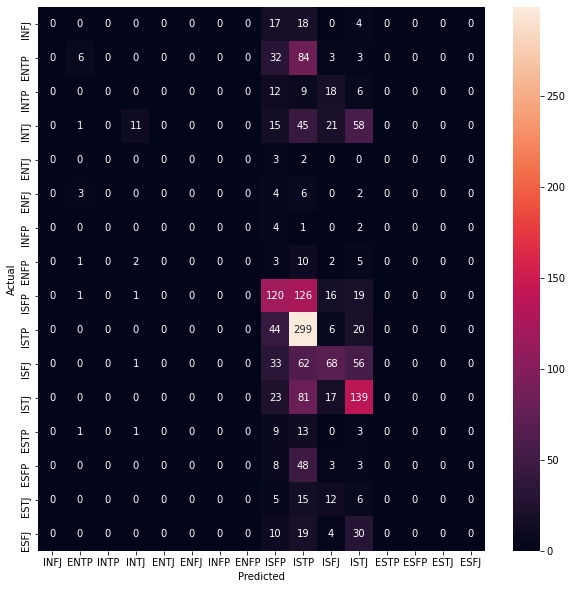

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 28)

model = LogisticRegression(random_state=0,solver='lbfgs', class_weight=None).fit(X_train, y_train)
filename = 'models/LogisticRegression.pkl'
with open(filename, 'wb') as infile:
    pickle.dump(model, infile)
    
print('model created')
    
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [4]:
import numpy as np

tfidf = np.load('ml/models/tfidf_vec.pkl', allow_pickle=True)

In [5]:

from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(['ni','ti','ne','te','se'])

#tfidf = TfidfVectorizer(stop_words=my_stop_words, sublinear_tf=True, min_df= 0, ngram_range=(1, 2))
#features = tfidf.fit_transform(df.text).toarray()

# Fit the model
#tf_transformer = tfidf.fit(df.text)

# Create new tfidfVectorizer with old vocabulary
tf1_new = TfidfVectorizer(stop_words=my_stop_words, sublinear_tf=True, min_df= 0, ngram_range=(1, 2),
                          vocabulary = tfidf.vocabulary_)
new_features = tf1_new.fit_transform(["""I like to spend a lot of time thinking about my feelings. I like having alone time.
                                    I care a lot about things happening in the world."""])

In [13]:
features.shape

(8675, 68153)

In [7]:
new_features.shape

(1, 63945)

In [10]:
model = np.load('ml/models/LogisticRegression.pkl', allow_pickle=True)

In [12]:
model.predict(new_features)

array(['INFP'], dtype=object)

In [30]:
features

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0383312, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [23]:
print(model.score(X_test,y_test))

0.37060518731988473


In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

              precision    recall  f1-score   support

        INFJ       0.00      0.00      0.00        39
        ENTP       0.46      0.05      0.09       128
        INTP       0.00      0.00      0.00        45
        INTJ       0.69      0.07      0.13       151
        ENTJ       0.00      0.00      0.00         5
        ENFJ       0.00      0.00      0.00        15
        INFP       0.00      0.00      0.00         7
        ENFP       0.00      0.00      0.00        23
        ISFP       0.35      0.42      0.38       283
        ISTP       0.36      0.81      0.50       369
        ISFJ       0.40      0.31      0.35       220
        ISTJ       0.39      0.53      0.45       260
        ESTP       0.00      0.00      0.00        27
        ESFP       0.00      0.00      0.00        62
        ESTJ       0.00      0.00      0.00        38
        ESFJ       0.00      0.00      0.00        63

    accuracy                           0.37      1735
   macro avg       0.17   

/opt/anaconda3/envs/deep_learning/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


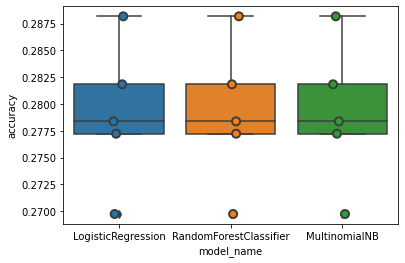

In [13]:

model_names = ['LogisticRegression','RandomForestClassifier','MultinomialNB']

for model_name in model_names:
    
    model = pickle.load(open(model_name + '.pkl', 'rb'))
    accuracy = np.load(model_name+ '.arr')
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [14]:
df.head()

,text,label
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear , I enjoyed our conversation the other...",INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ


In [35]:
df2 = df
df2['ext'] = extraverts.apply(lambda x : 1 if ('E' in x['label']) else 0, axis=1)
df2['int'] = extraverts.apply(lambda x : 1 if ('N' in x['label']) else 0, axis=1)
df2['tnk'] = extraverts.apply(lambda x : 1 if ('T' in x['label']) else 0, axis=1)
df2['jdg'] = extraverts.apply(lambda x : 1 if ('J' in x['label']) else 0, axis=1)

/opt/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df2

,text,label,ext,int,tnk,jdg
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,0,1,0,1
1,'I'm finding the lack of me in these posts ver...,ENTP,1,1,1,0
2,'Good one _____ https://www.youtube.com/wat...,INTP,0,1,1,0
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,0,1,1,1
4,'You're fired.|||That's another silly misconce...,ENTJ,1,1,1,1
...,...,...,...,...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP,0,0,0,0
8671,'So...if this thread already exists someplace ...,ENFP,1,1,0,0
8672,'So many questions when i do these things. I ...,INTP,0,1,1,0
8673,'I am very conflicted right now when it comes ...,INFP,0,1,0,0


In [40]:
def run_models(labels, features):
    models = [
    LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto', max_iter=500),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
  #  SVC(C = 1, gamma = 1, kernel = 'rbf'),
    MultinomialNB()
]
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    plt.show()

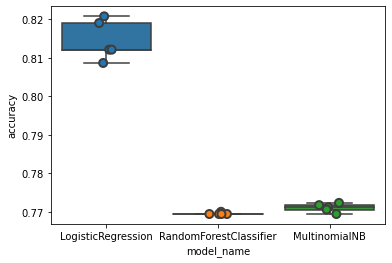

In [47]:
# Extraversion
labels_ext = df2.ext

run_models(labels_ext, features)

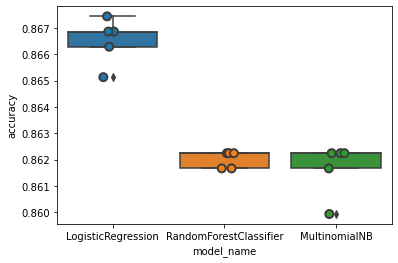

In [48]:
# Intuition
labels_int = df2.int

run_models(labels_int, features)

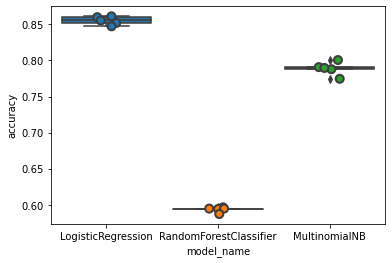

In [71]:
# Thinking
labels_tnk = df2.tnk

run_models(labels_tnk, features)

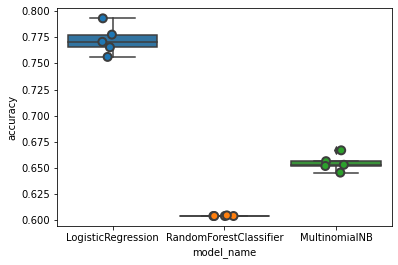

In [72]:
# Judging
labels_jdg = df2.jdg

run_models(labels_jdg, features)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_ext, y_test_ext = train_test_split(features, labels_ext, test_size=0.2, random_state = 28)
X_train, X_test, y_train_int, y_test_int = train_test_split(features, labels_int, test_size=0.2, random_state = 28)
X_train, X_test, y_train_tnk, y_test_tnk = train_test_split(features, labels_tnk, test_size=0.2, random_state = 28)
X_train, X_test, y_train_jdg, y_test_jdg = train_test_split(features, labels_jdg, test_size=0.2, random_state = 28)


In [78]:
lr_ext = LogisticRegression(random_state=0,solver='lbfgs', class_weight="balanced").fit(X_train, y_train_ext)
lr_int = LogisticRegression(random_state=0,solver='lbfgs', class_weight="balanced").fit(X_train, y_train_int)
lr_tnk = LogisticRegression(random_state=0,solver='lbfgs', class_weight="balanced").fit(X_train, y_train_tnk)
lr_jdg = LogisticRegression(random_state=0,solver='lbfgs', class_weight="balanced").fit(X_train, y_train_jdg)
print(lr_ext.score(X_test,y_test_ext))
print(lr_int.score(X_test,y_test_int))
print(lr_tnk.score(X_test,y_test_tnk))
print(lr_jdg.score(X_test,y_test_jdg))

0.8282420749279539
0.8737752161383285
0.8582132564841498
0.8069164265129684


In [79]:
df['ext_pred'] = lr_ext.predict(features)
df['int_pred'] = lr_int.predict(features)
df['tnk_pred'] = lr_int.predict(features)
df['jdg_pred'] = lr_int.predict(features)

In [80]:
df.head()

,text,label,ext,int,tnk,jdg,ext_pred,int_pred,tnk_pred,jdg_pred
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,0,1,0,1,0,1,1,1
1,'I'm finding the lack of me in these posts ver...,ENTP,1,1,1,0,1,1,1,1
2,'Good one _____ https://www.youtube.com/wat...,INTP,0,1,1,0,0,1,1,1
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,0,1,1,1,0,1,1,1
4,'You're fired.|||That's another silly misconce...,ENTJ,1,1,1,1,1,1,1,1


In [91]:
def get_label_pred(text):
    if text.ext_pred == 1:
        ext = 'E'
    else:
        ext = 'I'
    if text.int_pred == 1:
        intu = 'N'
    else:
        intu = 'S'
    if text.tnk_pred == 1:
        tnk = 'T'
    else:
        tnk = 'F'
    if text.jdg_pred == 1:
        jdg = 'J'
    else:
        jdg = 'P'
        
    return ext + intu + tnk + jdg

In [92]:
df['label_pred'] = df.apply(get_label_pred, axis=1)

In [93]:
df

,text,label,ext,int,tnk,jdg,ext_pred,int_pred,tnk_pred,jdg_pred,label_pred
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,0,1,0,1,0,1,1,1,INTJ
1,'I'm finding the lack of me in these posts ver...,ENTP,1,1,1,0,1,1,1,1,ENTJ
2,'Good one _____ https://www.youtube.com/wat...,INTP,0,1,1,0,0,1,1,1,INTJ
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,0,1,1,1,0,1,1,1,INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ,1,1,1,1,1,1,1,1,ENTJ
...,...,...,...,...,...,...,...,...,...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP,0,0,0,0,0,0,0,0,ISFP
8671,'So...if this thread already exists someplace ...,ENFP,1,1,0,0,1,1,1,1,ENTJ
8672,'So many questions when i do these things. I ...,INTP,0,1,1,0,0,1,1,1,INTJ
8673,'I am very conflicted right now when it comes ...,INFP,0,1,0,0,0,1,1,1,INTJ


In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(df.label, df.label_pred)

0.1572334293948127